In [1]:
import pandas as pd
import numpy as np
from datetime import date
from dateutil.relativedelta import relativedelta
import yfinance as yf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="yfinance") 

In [2]:
# Pull one year of data
end_date = date(2024,2,1) #or date.today() for latest date
start_date = end_date - relativedelta(years=1)
ticker = 'QQQ'
df = yf.download([ticker], start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01,294.410004,303.429993,292.299988,300.920013,298.855133,67562200
2023-02-02,307.570007,313.679993,306.730011,311.720001,309.580994,83070600
2023-02-03,304.940002,312.390015,304.540009,306.179993,304.079041,76170800
2023-02-06,303.510010,305.910004,302.220001,303.589996,301.506805,40802300
2023-02-07,303.459991,311.029999,302.320007,309.880005,307.753662,67584000


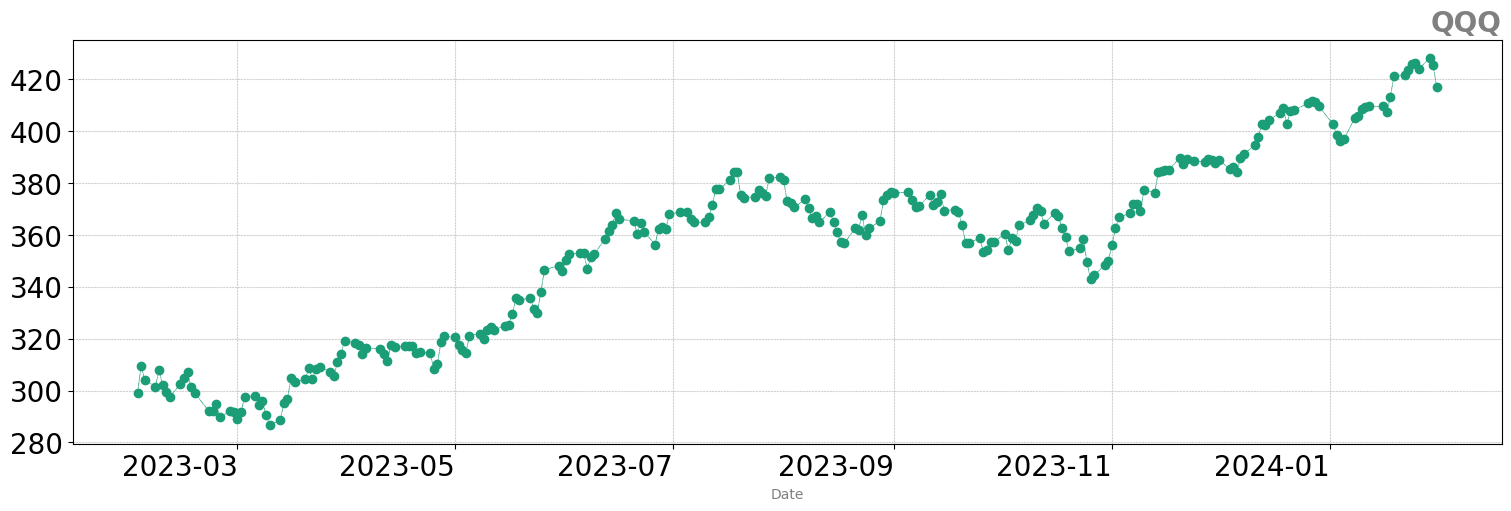

In [3]:
ax=df['Adj Close'].plot(figsize=(15,5), marker='o',lw=0.5, rot=0, fontsize=20)
ax.set_title(ticker, fontsize=20, weight='bold')
ax.grid(True, color='lightgray')

In [4]:
# Resample data for 2 calendar days
df.resample('2D').agg(({'Adj Close':'last', 'Volume': 'sum'})).head(8)

,Adj Close,Volume
Date,,
2023-02-01,309.580994,150632800
2023-02-03,304.079041,76170800
2023-02-05,301.506805,40802300
2023-02-07,302.281494,124304900
2023-02-09,297.643555,99187900
2023-02-11,NaN,0
2023-02-13,304.645142,103715800
2023-02-15,301.218781,102599200


In [5]:
# Resample data for business dates only
df.resample('2B').agg(({'Adj Close':'last', 'Volume': 'sum'})).head(8)

,Adj Close,Volume
Date,,
2023-02-01,309.580994,150632800
2023-02-03,301.506805,116973100
2023-02-07,302.281494,124304900
2023-02-09,297.643555,99187900
2023-02-13,304.645142,103715800
2023-02-15,301.218781,102599200
2023-02-17,299.093506,58230700
2023-02-21,292.230896,97915900


In [6]:
nDays=2 # Group 2 consecutive dates into one group
dfG = df.copy()[['Adj Close','Volume']] # select only 2 columns
dfG['DaysCategory']=(dfG.reset_index().index/2 + 1 ).astype(int)
dfG.head(6)

,Adj Close,Volume,DaysCategory
Date,,,
2023-02-01,298.855133,67562200,1
2023-02-02,309.580994,83070600,1
2023-02-03,304.079041,76170800,2
2023-02-06,301.506805,40802300,2
2023-02-07,307.753662,67584000,3
2023-02-08,302.281494,56720900,3


In [7]:
dfG.groupby('DaysCategory').agg(({'Adj Close': 'last', 'Volume': 'sum'})).head()

,Adj Close,Volume
DaysCategory,,
1,309.580994,150632800
2,301.506805,116973100
3,302.281494,124304900
4,297.643555,99187900
5,304.645142,103715800


### binSize=10

Text(1.0, 1.0, 'Stable price range for QQQ binSize=10')

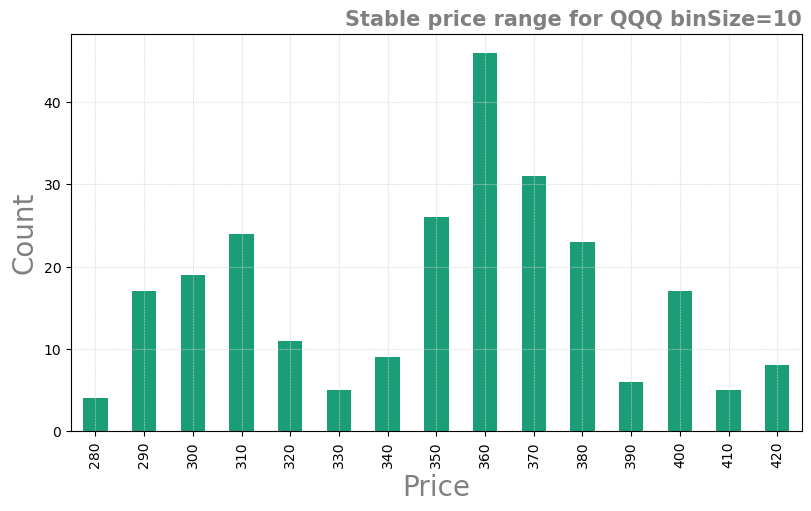

In [8]:
binSize=10
dfG = df.copy()[['Adj Close','Volume']] # select only 2 columns
dfG['CAT']=(dfG['Adj Close']/binSize).astype(int)*binSize # Create Bins
dfG['COUNT']=1 # Every element in each Bin gets a weight of 1
# Plot bins
ax=dfG.groupby('CAT').sum()['COUNT'].plot(kind='bar')
ax.grid(True,color='lightgray',alpha=0.5)
ax.set_xlabel('Price',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_title(f'Stable price range for QQQ binSize={binSize}',fontsize=15, weight='bold')

### binSize=30

Text(1.0, 1.0, 'Stable price range for QQQ binSize=30')

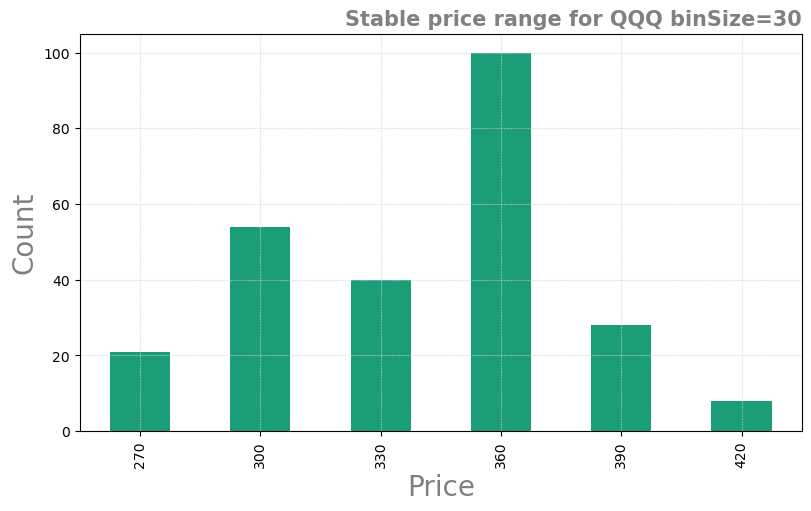

In [9]:
binSize=30
dfG = df.copy()[['Adj Close','Volume']] # select only 2 columns
dfG['CAT']=(dfG['Adj Close']/binSize).astype(int)*binSize # Create Bins
dfG['COUNT']=1 # Every element in each Bin gets a weight of 1
# Plot bins
ax=dfG.groupby('CAT').sum()['COUNT'].plot(kind='bar')
ax.grid(True,color='lightgray',alpha=0.5)
ax.set_xlabel('Price',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.set_title(f'Stable price range for QQQ binSize={binSize}',fontsize=15, weight='bold')

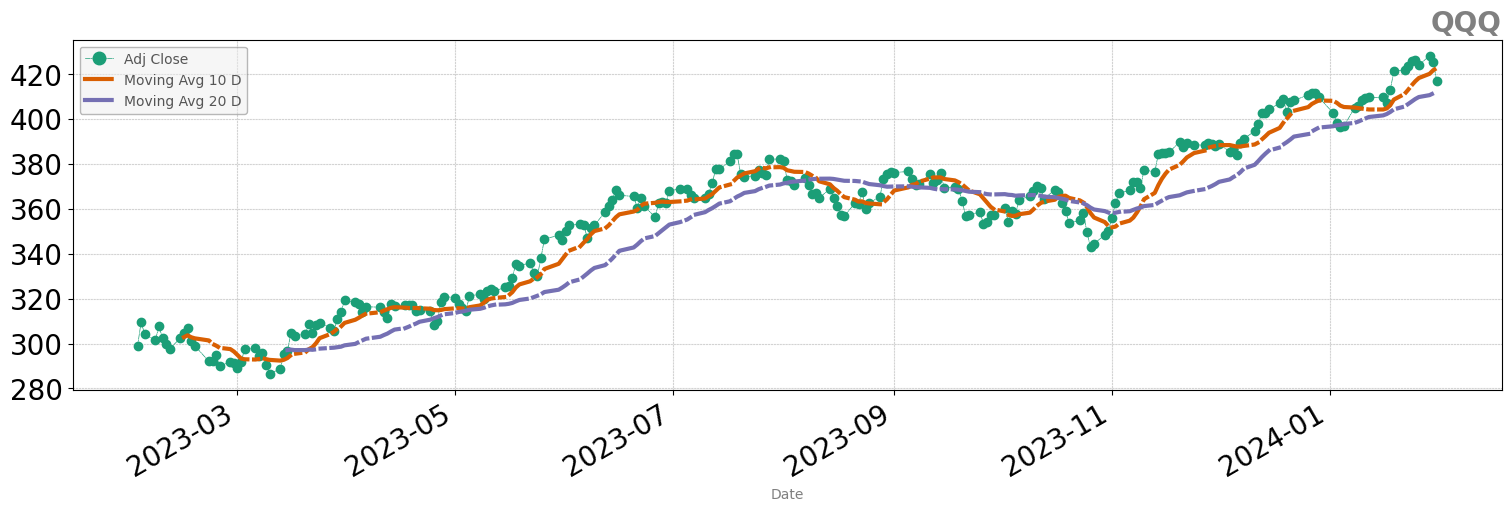

In [10]:
ax=df['Adj Close'].plot(figsize=(15,5), marker='o',lw=0.5, rot=0, fontsize=20)
df.rolling(window=10).mean()['Adj Close'].dropna().plot(ax=ax)
df.rolling(window=30).mean()['Adj Close'].dropna().plot(ax=ax)
ax.legend(['Adj Close', 'Moving Avg 10 D', 'Moving Avg 20 D'])
ax.set_title(ticker, fontsize=20, weight='bold')
ax.grid(True, color='lightgray')